In [1]:
# Importing the libraries to be used for data import and data visualization

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# Reading and displaying the csv file using pandas

df = pd.read_csv("Bachelor_Degree_Majors.csv")
df.head(10)

,State,Sex,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,Total,25 and younger,885357,263555,98445,210147,141071,172139
1,Alabama,Total,25 to 39,268924,90736,32378,58515,29342,57953
2,Alabama,Total,40 to 64,418480,115762,46724,112271,63875,79848
3,Alabama,Total,65 and older,197953,57057,19343,39361,47854,34338
4,Alabama,Male,25 and younger,405618,159366,26004,113909,29490,76849
5,Alabama,Male,25 to 39,117794,50188,7712,29859,6357,23678
6,Alabama,Male,40 to 64,184328,67977,12331,54931,12820,36269
7,Alabama,Male,65 and older,103496,41201,5961,29119,10313,16902
8,Alabama,Female,25 and younger,479739,104189,72441,96238,111581,95290
9,Alabama,Female,25 to 39,151130,40548,24666,28656,22985,34275


In [6]:
# Reformatting the dataset so that the dataset is grouped by the State and the Age groups

# Note: To use the or/and functionality in Pandas, ensure that each condition is in parentheses and implement the bitwise or '|'
# and bitwise '&' operators as shown below

df_age = df[(df.Sex != 'Male') & (df.Sex!='Female')].copy(deep = True)
df_age.drop(['Sex'], axis = 1, inplace = True)
df_age_final = df_age.reset_index(drop = 'index')
df_age_final

,State,Age Group,Bachelor's Degree Holders,Science and Engineering,Science and Engineering Related Fields,Business,Education,"Arts, Humanities and Others"
0,Alabama,25 and younger,885357,263555,98445,210147,141071,172139
1,Alabama,25 to 39,268924,90736,32378,58515,29342,57953
2,Alabama,40 to 64,418480,115762,46724,112271,63875,79848
3,Alabama,65 and older,197953,57057,19343,39361,47854,34338
4,Alaska,25 and younger,146157,57375,14226,22507,17283,34766
...,...,...,...,...,...,...,...,...
199,Wisconsin,65 and older,257750,74382,31193,34409,68326,49440
200,Wyoming,25 and younger,113557,41541,11843,16670,22550,20953
201,Wyoming,25 to 39,32032,12159,3266,4662,4147,7798
202,Wyoming,40 to 64,50686,16255,5424,8904,10707,9396


In [7]:
# Displaying column headers in our dataset

df_age_final.columns

Index(['State', 'Age Group', 'Bachelor's Degree Holders',
       'Science and Engineering', 'Science and Engineering Related Fields',
       'Business', 'Education', 'Arts, Humanities and Others'],
      dtype='object')

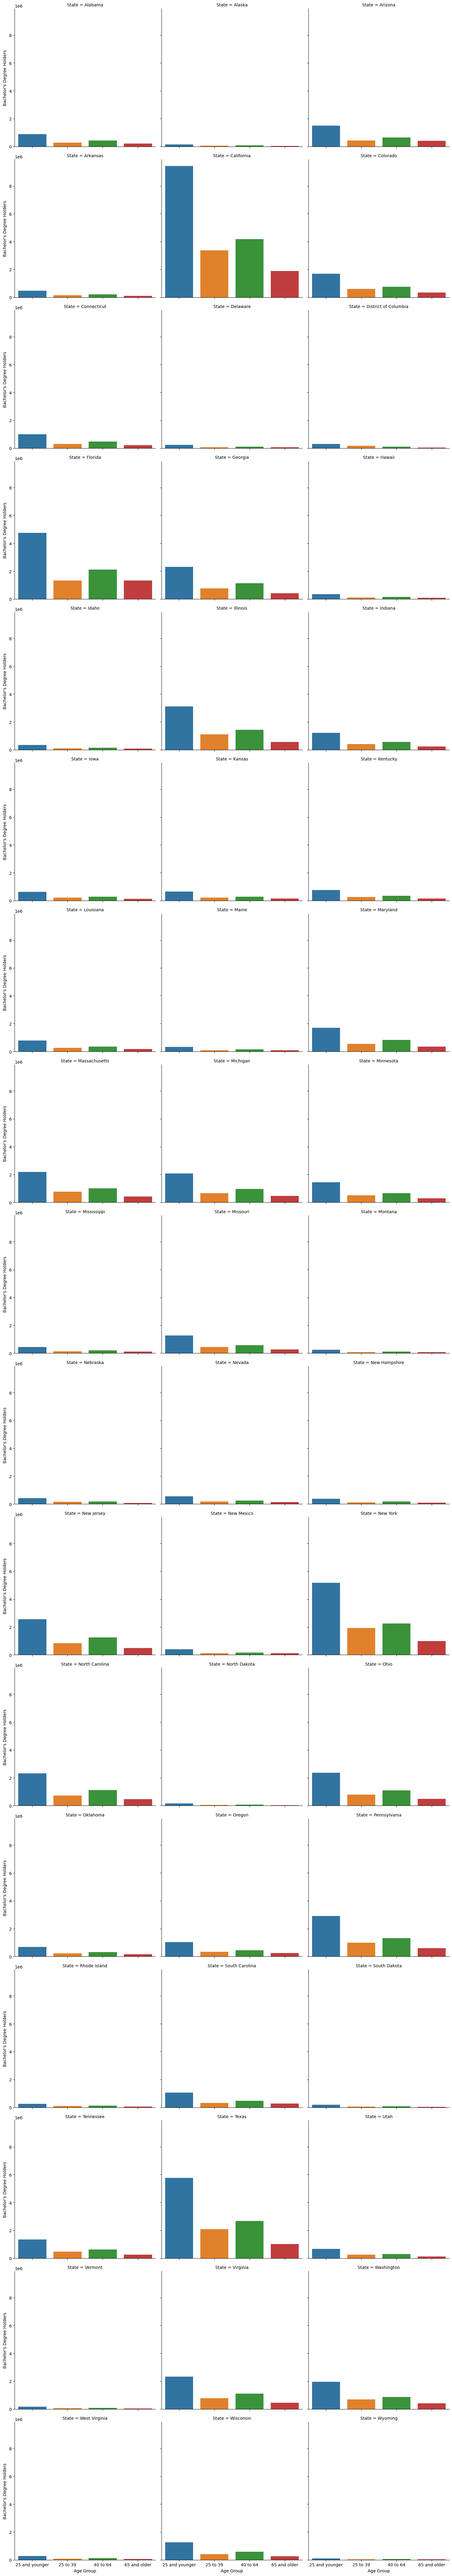

In [8]:
# Using seaborn's catplot, we can create a Grid of plots, which allows us more functionality as you will see further down
# Starting at a base level, we have the x axis as the Age Group, the y axis as the number of students with a Bachelor's degree
# and by using the row parameter, using which we are plotting these charts for each state

# Note: col_wrap limits the columns to 3 per row

sns.catplot(x='Age Group', y = "Bachelor's Degree Holders", col = 'State', col_wrap = 3, data = df_age_final, kind='bar')

plt.show()

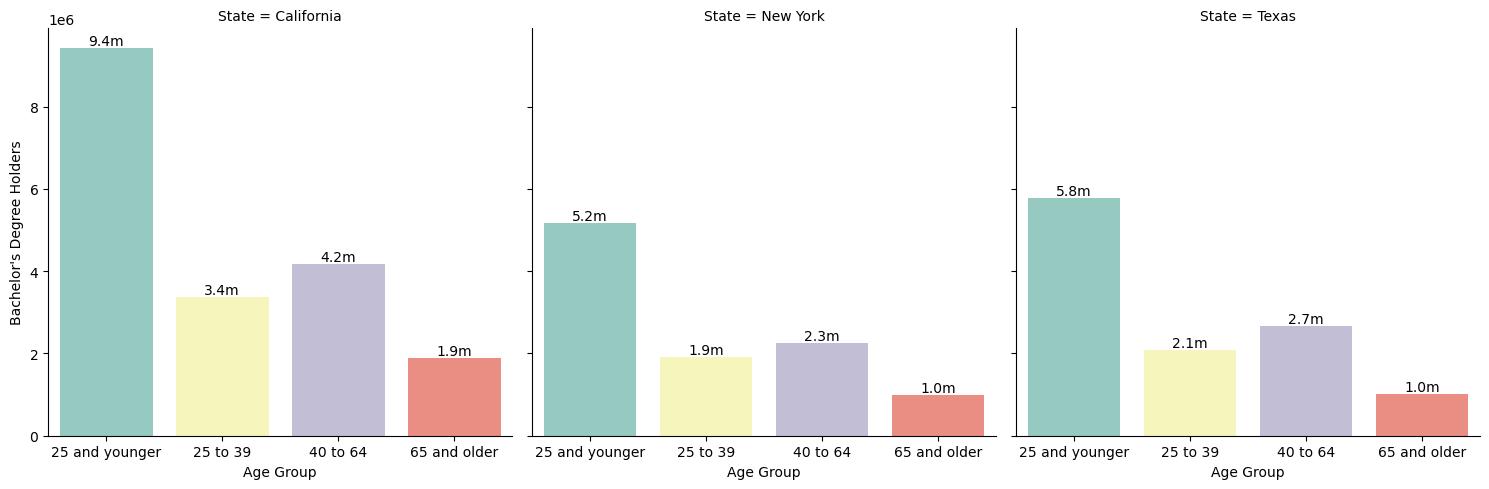

In [9]:
# The charts above are scattered and not close to each other in terms of actual data numbers
# To make better use of the dataset, we shall use the top 3 states in terms of number of students as shown below

# Note: To use the or/and functionality in Pandas, ensure that each condition is in parentheses and implement the bitwise or '|'
# and bitwise '&' operators as shown below

df_age_exc = df_age_final[(df_age_final.State == 'California') | (df_age_final.State == 'New York') | \
                          (df_age_final.State == 'Texas') ]

# Following from the previous code, we have updated the color scheme to less harsher looking ones :) 

graph = sns.catplot(x='Age Group', y = "Bachelor's Degree Holders", col = 'State', col_wrap = 3, \
                    data = df_age_exc, kind='bar', palette = sns.color_palette('Set3'))


# Using the ravel function, we are going through each container to label the bars for all the plots using the get_height func
# to place labels on the top of our vertical rectangles. We are dividing it by a million to format it as XX.XXm.

for ax in graph.axes.ravel():   
    for container in ax.containers:
        labels = [f'{(rect.get_height() / 1000000):.1f}m' for rect in container]
        ax.bar_label(container, labels=labels, label_type='edge')

plt.show()

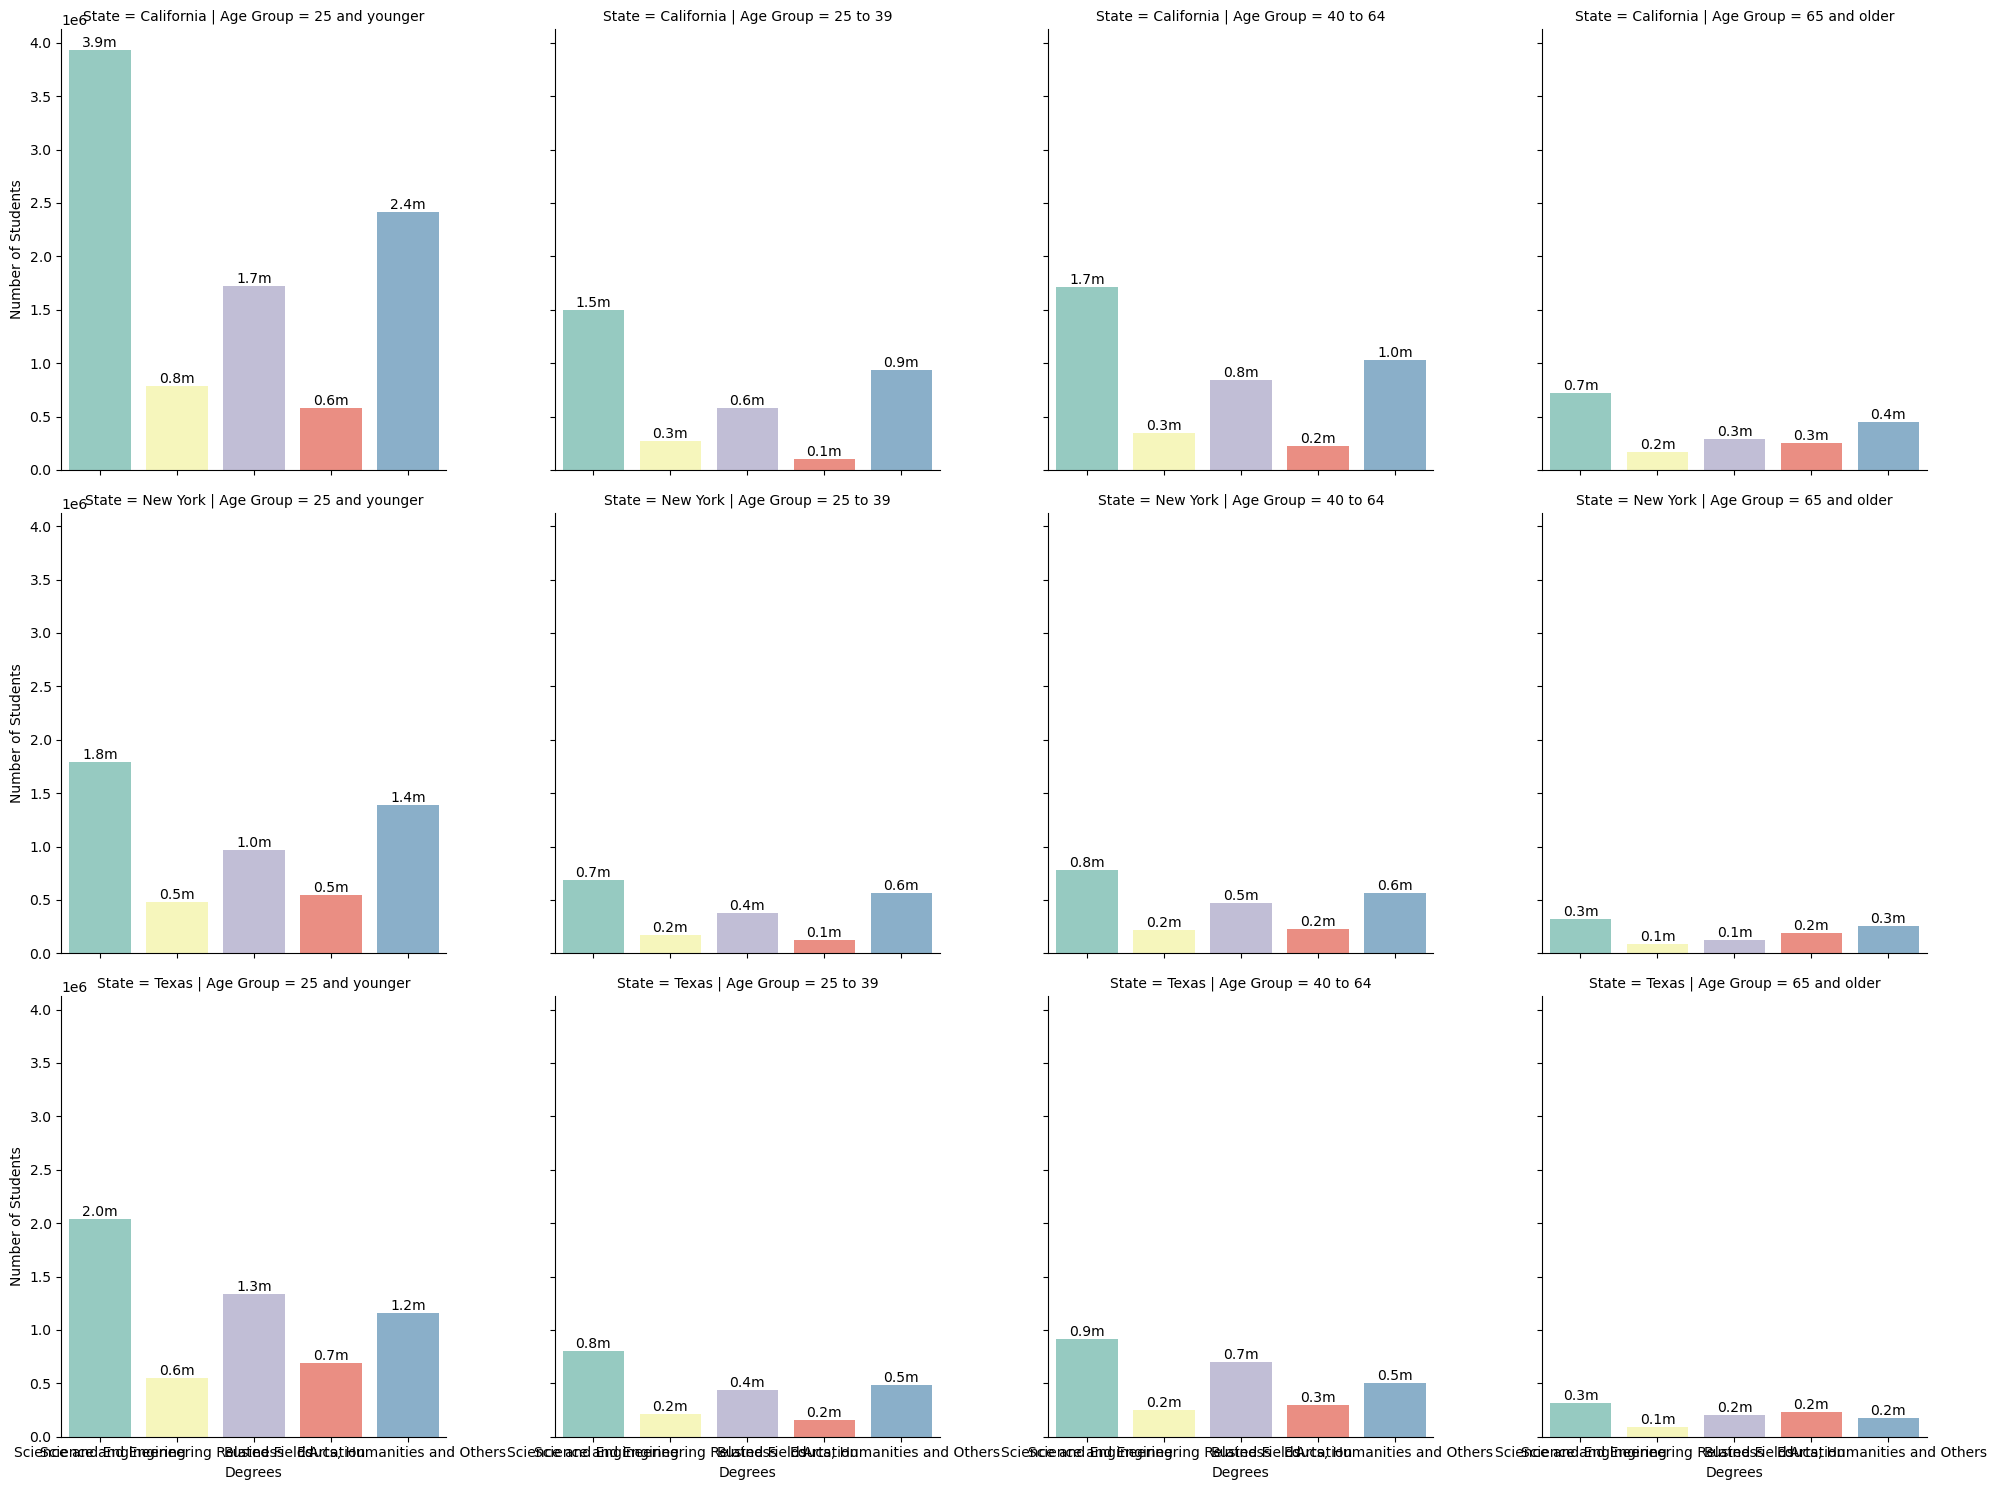

In [10]:
# We could stop with what we have above but let's take it a step further by making use of pandas' melt function and
# and the FacetGrid from catplot

# The melt function essentially pivots columns, tagged value_vars, based on identifiers, tagged id_vars.
# We label the values, tagged value_name, and variables, tagged var_name, based on our dataset to use it in the catplot
# Using catplot's FacetGrid, we can plot a bar plot for a given x and y for all combinations of row = row_val and col = col_val
# In this case, we will be plotting Degrees vs Number of Students for each combination of State and Age Group

graph = sns.catplot(data = df_age_exc.melt(id_vars = ['State','Age Group'], \
                                           value_vars = ['Science and Engineering', 'Science and Engineering Related Fields',
       'Business', 'Education', 'Arts, Humanities and Others'], value_name = 'Number of Students', var_name = 'Degrees'), \
                    x = 'Degrees', y = 'Number of Students', col = 'Age Group', row = 'State', kind = 'bar', \
                    palette = sns.color_palette('Set3'))

for ax in graph.axes.ravel():
    for container in ax.containers:
        labels = [f'{(rect.get_height() / 1000000):.1f}m' for rect in container]
        ax.bar_label(container, labels=labels, label_type='edge')

plt.show()

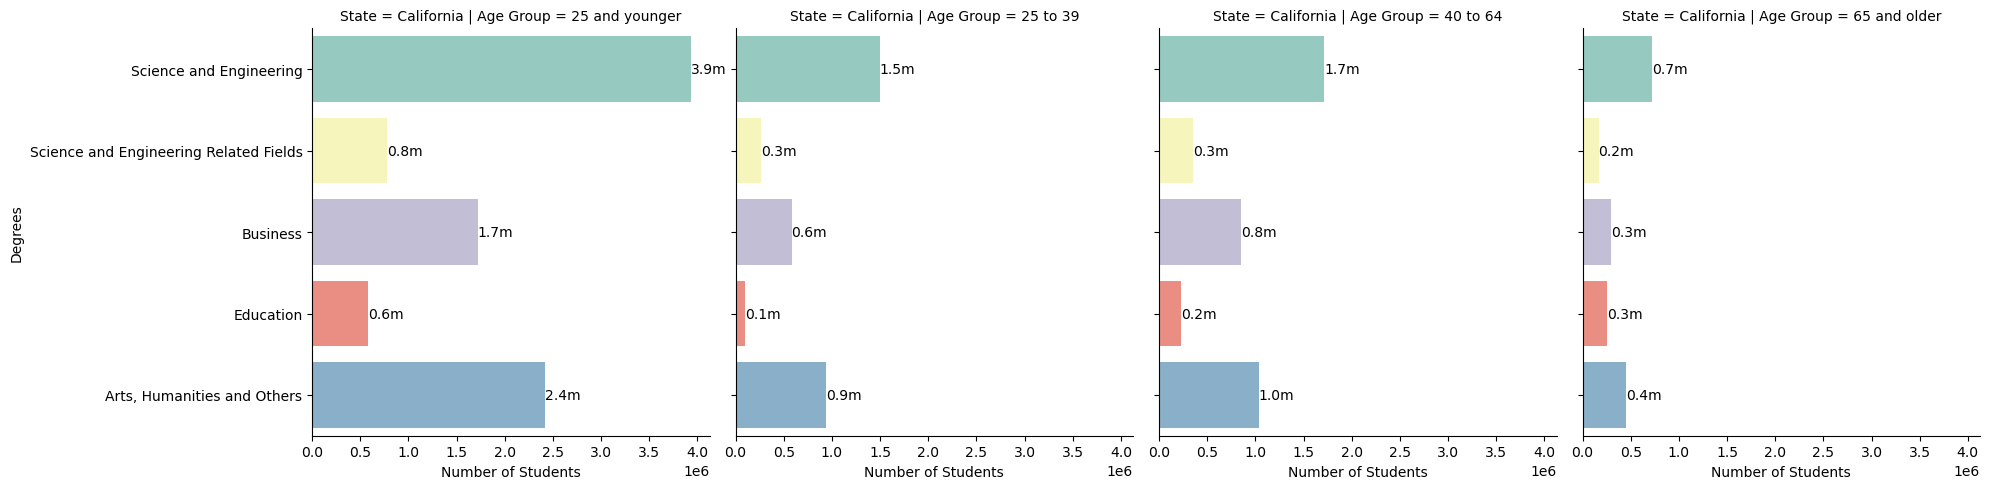

In [11]:
# The data above is still cluttered, so for the sake of our use case, we shall only use California's data

df_age_cali = df_age_exc[df_age_exc.State == 'California']

# To make the graph neater, we convert the plot from vertical to horizontal by swapping the x and y parameters

graph = sns.catplot(data = df_age_cali.melt(id_vars=['State','Age Group'], value_vars = [
       'Science and Engineering', 'Science and Engineering Related Fields',
       'Business', 'Education', 'Arts, Humanities and Others'], value_name = 'Number of Students', var_name = 'Degrees'), \
                    x = 'Number of Students', y = 'Degrees', col = 'Age Group', row = 'State', kind = 'bar', orient = 'h', \
                    palette = sns.color_palette('Set3'))
# Since we are using horizontal bars, we use the get_width func to place labels on the top(right) of our horizontal rectangles

for ax in graph.axes.ravel():
    for container in ax.containers:
        labels = [f'{(rect.get_width() / 1000000):.1f}m' for rect in container]
        ax.bar_label(container, labels=labels, label_type='edge')
    
plt.savefig("California Bachelor's Degrees by Age and Field")
plt.show()